In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install bnlp_toolkit

     |████████████████████████████████| 1.2MB 2.9MB/s 
     |████████████████████████████████| 23.9MB 122kB/s 
     |████████████████████████████████| 747kB 34.2MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
pip install bnltk

In [ ]:
pip install chart_studio

     |████████████████████████████████| 71kB 2.1MB/s 


In [ ]:
!pip install -q -U watermark

In [ ]:
pip install transformers[sentencepiece]

     |████████████████████████████████| 2.3MB 3.0MB/s 
     |████████████████████████████████| 901kB 19.0MB/s 
     |████████████████████████████████| 3.3MB 22.9MB/s 
     |████████████████████████████████| 1.1MB 34.9MB/s 
  Found existing installation: sentencepiece 0.1.95
    Uninstalling sentencepiece-0.1.95:
      Successfully uninstalled sentencepiece-0.1.95


In [ ]:
pip install transformers==3

     |████████████████████████████████| 757kB 3.0MB/s 
     |████████████████████████████████| 3.0MB 13.6MB/s 
  Found existing installation: tokenizers 0.10.2
    Uninstalling tokenizers-0.10.2:
      Successfully uninstalled tokenizers-0.10.2
  Found existing installation: transformers 4.6.1
    Uninstalling transformers-4.6.1:
      Successfully uninstalled transformers-4.6.1


In [ ]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 5.5.0

numpy       : 1.19.5
pandas      : 1.1.5
torch       : 1.8.1+cu101
transformers: 3.0.0



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
import string
import random
import gensim
import os
import re
import collections
from collections import defaultdict
from bnlp import BasicTokenizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

from transformers import AutoTokenizer, AutoModel
import tensorflow as tf
from transformers import BertTokenizer, TFBertForPreTraining, BertModel, AdamW, get_linear_schedule_with_warmup
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Optimizer
from torch.optim.lr_scheduler import LambdaLR

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/BERT/Dataset/Cricket_Updated.xlsx', sheet_name='Sheet1', usecols=['Text', 'BTSC_Polarity'], dtype={'Text': str})
df.head(10)

,Text,BTSC_Polarity
0,জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। ...,2
1,জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। ...,2
2,বাংলাদেশের পরে ভারতের সাপর্ট ই করি ?।,2
3,সৌম্যকে বাদ দেওয়া হোক।,0
4,"প্রথমটি হচ্ছে, কোচ অত:পর সাকিব,সাকিব আর সাকিবর...",2
5,"প্রথমটি হচ্ছে, কোচ অত:পর সাকিব,সাকিব আর সাকিবর...",2
6,মুসফিক আর তামিমের বেটিং তান্ড়বে কুহিলির জিব্ব...,0
7,সত্যি সত্যিই ছিলো বাঘ আমাদেরই চাপে হয়ে গেলো ব...,0
8,বাংলাদেশ জিতবে ইনশা আল্লাহ।,2
9,"ক্রিকেটে ভারত একটা অসভ্য দল,বিরাট কোহলির আচরনে...",0


In [ ]:
dataset = df["Text"].values

In [ ]:
dataset[0]

'জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। যার মাথা থেকে এমন চমৎকার আইডিয়া এসেছে তালে স্যালুট।'

In [ ]:
with open ("/content/drive/MyDrive/Colab Notebooks/BERT/Dataset/stopWordModel.txt", encoding='utf8') as myfile:
  listOfStopWord = myfile.read().splitlines()

with open ("/content/drive/MyDrive/Colab Notebooks/BERT/Dataset/special letters.txt", encoding='utf8') as myfile:
  SpecialLetters = myfile.read().splitlines()

## ADD two list 
mergedlistofStopWords = []
mergedlistofStopWords.extend(SpecialLetters)
mergedlistofStopWords.extend(listOfStopWord)

In [ ]:
corpus = df['Text'].tolist()
corpus[2978]

'টিম মেনেজমেন্ট থেকে শুরু করে সবাইকে গাজার পরিবর্তে অাফিম দেওয়া প্রয়োজন... যাতে নেশা হলে ও মস্তিষ্কটা নিয়ন্ত্রণে থাকে.....ফালতু সব গাজাখুড়ি বাহানা।'

In [ ]:
basic_tokenizer = BasicTokenizer()
Sequence_list = []
sentecnceList = []
listOfTotalSentence_list = []
resultToken = ""
sentence = ""

for i in range(0, len(corpus)):
  extractToken = basic_tokenizer.tokenize(corpus[i])
  resultToken = [k for k in extractToken if k not in mergedlistofStopWords]
  #print(extractToken)
  listOfTotalSentence_list.append(resultToken)
  for token in resultToken:
      sentence = sentence + " " + token
  Sequence_list.append(sentence)
  sentence = ""

In [ ]:
Sequence_list[:10]

[' জয় বাংলা কাপ স্বাধীনতার মাস মার্চে মাথা চমৎকার আইডিয়া এসেছে তালে স্যালুট',
 ' জয় বাংলা কাপ স্বাধীনতার মাস মার্চে মাথা চমৎকার আইডিয়া এসেছে তালে স্যালুট',
 ' বাংলাদেশের ভারতের সাপর্ট',
 ' সৌম্যকে বাদ দেওয়া',
 ' প্রথমটি কোচ অত সাকিব সাকিব সাকিবরে দলে রাখা',
 ' প্রথমটি কোচ অত সাকিব সাকিব সাকিবরে দলে রাখা',
 ' মুসফিক তামিমের বেটিং তান্ড়বে কুহিলির জিব্বহাটা শুকিয়ে গেছেরে গরুর মুত খাওয়ার',
 ' সত্যি সত্যিই বাঘ আমাদেরই চাপে গেলো বেড়াল',
 ' বাংলাদেশ জিতবে ইনশা আল্লাহ',
 ' ক্রিকেটে ভারত অসভ্য দল বিরাট কোহলির আচরনে স্পষ্ট ফুটে উঠে']

In [ ]:
len(Sequence_list)

2979

In [ ]:
len(df)

2979

In [ ]:
df['Text'][0]

'জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। যার মাথা থেকে এমন চমৎকার আইডিয়া এসেছে তালে স্যালুট।'

In [ ]:
for i in range(0, len(df)):
  df['Text'][i] = Sequence_list[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.head(10)

,Text,BTSC_Polarity
0,জয় বাংলা কাপ স্বাধীনতার মাস মার্চে মাথা চমৎকা...,2
1,জয় বাংলা কাপ স্বাধীনতার মাস মার্চে মাথা চমৎকা...,2
2,বাংলাদেশের ভারতের সাপর্ট,2
3,সৌম্যকে বাদ দেওয়া,0
4,প্রথমটি কোচ অত সাকিব সাকিব সাকিবরে দলে রাখা,2
5,প্রথমটি কোচ অত সাকিব সাকিব সাকিবরে দলে রাখা,2
6,মুসফিক তামিমের বেটিং তান্ড়বে কুহিলির জিব্বহাট...,0
7,সত্যি সত্যিই বাঘ আমাদেরই চাপে গেলো বেড়াল,0
8,বাংলাদেশ জিতবে ইনশা আল্লাহ,2
9,ক্রিকেটে ভারত অসভ্য দল বিরাট কোহলির আচরনে স্প...,0


In [ ]:
df['Text'][4]

' প্রথমটি কোচ অত সাকিব সাকিব সাকিবরে দলে রাখা'

In [ ]:
corpus[4]

'প্রথমটি হচ্ছে, কোচ অত:পর সাকিব,সাকিব আর সাকিবরে দলে রাখা।'

In [ ]:
class_names = ['negative', 'neutral', 'positive']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


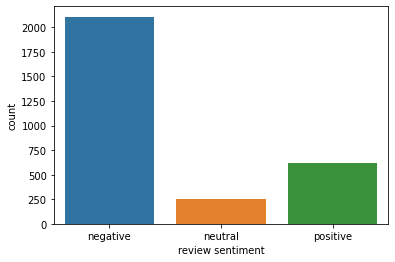

In [ ]:
ax = sns.countplot(df.BTSC_Polarity)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);



```
# This is formatted as code
```

### **Preprocessing Section**

In [ ]:
###https://huggingface.co/transformers/model_doc/bert.html#

In [ ]:
PRE_TRAINED_MODEL_NAME = 'sagorsarker/bangla-bert-base'   ### https://huggingface.co/sagorsarker/bangla-bert-base

In [ ]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
sample_txt = corpus[0]
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: জয় বাংলা কাপ! তাও আবার স্বাধীনতার মাস মার্চে। যার মাথা থেকে এমন চমৎকার আইডিয়া এসেছে তালে স্যালুট।
   Tokens: ['জ', '##য', 'বাংলা', 'কাপ', '!', 'তাও', 'আবার', 'সব', '##াধীন', '##তার', 'মাস', 'মার', '##চে', '।', 'যার', 'মাথা', 'থেকে', 'এমন', 'চমৎকার', 'আইডি', '##যা', 'এসেছে', 'তালে', 'স', '##যা', '##লট', '।']
Token IDs: [7360, 9294, 2492, 2991, 999, 7659, 2239, 2132, 24484, 4305, 2416, 6723, 11650, 1014, 2305, 3755, 2043, 2168, 6162, 9709, 7724, 2500, 14045, 3091, 7724, 40654, 1014]


In [ ]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  truncation=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)

encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [ ]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

32


tensor([  101,  7360,  9294,  2492,  2991,   999,  7659,  2239,  2132, 24484,
         4305,  2416,  6723, 11650,  1014,  2305,  3755,  2043,  2168,  6162,
         9709,  7724,  2500, 14045,  3091,  7724, 40654,  1014,   102,     0,
            0,     0])

In [ ]:
tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])

['[CLS]',
 'জ',
 '##য',
 'বাংলা',
 'কাপ',
 '!',
 'তাও',
 'আবার',
 'সব',
 '##াধীন',
 '##তার',
 'মাস',
 'মার',
 '##চে',
 '।',
 'যার',
 'মাথা',
 'থেকে',
 'এমন',
 'চমৎকার',
 'আইডি',
 '##যা',
 'এসেছে',
 'তালে',
 'স',
 '##যা',
 '##লট',
 '।',
 '[SEP]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

### **###END**

In [ ]:
token_lens = []
Token_Store = []
max_counts = 0
count_of_max_sentence = 0

for text in Sequence_list:
  #print(text)
  tokens = tokenizer.encode(text)
  Token_Store.append(tokens)
  print(tokens)
  max_counts = len(tokens)
  if max_counts > count_of_max_sentence:
    count_of_max_sentence = max_counts
  max_counts = 0
  token_lens.append(len(tokens))

[101, 7360, 9294, 2492, 2991, 2132, 24484, 4305, 2416, 6723, 11650, 3755, 6162, 9709, 7724, 2500, 14045, 3091, 7724, 40654, 102]
[101, 7360, 9294, 2492, 2991, 2132, 24484, 4305, 2416, 6723, 11650, 3755, 6162, 9709, 7724, 2500, 14045, 3091, 7724, 40654, 102]
[101, 2119, 2160, 8998, 2046, 4804, 102]
[101, 100, 3078, 21380, 7724, 102]
[101, 2076, 25492, 2294, 2285, 35705, 11985, 4798, 4798, 4798, 6187, 2535, 2366, 102]
[101, 2076, 25492, 2294, 2285, 35705, 11985, 4798, 4798, 4798, 6187, 2535, 2366, 102]
[101, 23143, 32176, 10793, 23682, 4575, 2082, 2392, 3447, 6086, 61264, 4999, 24818, 33951, 42929, 16996, 56885, 2094, 2149, 6187, 32993, 2046, 2797, 31331, 14979, 102]
[101, 36079, 33983, 36079, 33983, 2062, 7385, 6896, 4927, 2641, 2395, 14704, 4194, 102]
[101, 2098, 14736, 36540, 2493, 40145, 102]
[101, 2355, 60316, 2269, 19362, 5500, 9294, 2190, 3639, 2285, 14109, 13807, 33439, 2094, 73835, 96152, 8563, 10237, 2632, 102]
[101, 2098, 14736, 36540, 2493, 40145, 102]
[101, 73835, 45156, 204

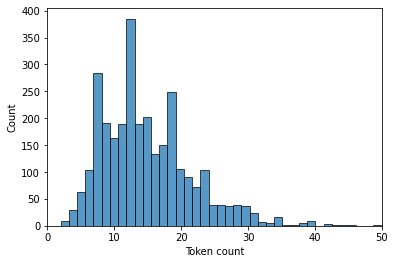

In [ ]:
sns.histplot(token_lens)
plt.xlim([0, 50]);
plt.xlabel('Token count');

In [ ]:
print("Max value element : ", max(token_lens))

Max value element :  56


In [ ]:
count_of_max_sentence

56

In [ ]:
max_len = 60

In [ ]:
def FindMaxLength_Of_ListOfList(lst):
  maxList = max((x) for x in lst)
  maxLength = max(len(x) for x in lst )
  
  return maxList, maxLength
      
print(FindMaxLength_Of_ListOfList(Sequence_list))
print(FindMaxLength_Of_ListOfList(Token_Store))

(' 🎊 তামিম ইকবাল খান জানতাম আজকে ৫০ রান', 157)
([101, 101961, 18849, 3012, 102], 56)


In [ ]:
sample_txt = ' 🎊 তামিম ইকবাল খান জানতাম আজকে ৫০ রান'
tokens_test = tokenizer.tokenize(sample_txt)
token_ids_test = tokenizer.convert_tokens_to_ids(tokens_test)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens_test}')
print(f'Token IDs: {token_ids_test}')

 Sentence:  🎊 তামিম ইকবাল খান জানতাম আজকে ৫০ রান
   Tokens: ['[UNK]', 'তামিম', 'ইকবাল', 'খান', 'জানতাম', 'আজকে', '[UNK]', 'রান']
Token IDs: [100, 4443, 4149, 2328, 13818, 8707, 100, 2331]


### **blocks required to create a PyTorch dataset**

In [ ]:
class GPReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.reviews)
  
  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(review, add_special_tokens=True, max_length=self.max_len, return_token_type_ids=False, pad_to_max_length=True, truncation=True, return_attention_mask=True, return_tensors='pt',)

    return {'review_text': review, 'input_ids': encoding['input_ids'].flatten(), 'attention_mask': encoding['attention_mask'].flatten(),'targets': torch.tensor(target, dtype=torch.long)}

### **Split the data:**

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=42)

In [ ]:
df_train

,Text,BTSC_Polarity
727,নতু পুরাতন ভালো পারফরমেন্স দলে ফিরাতেই,0
705,রাজ্জাকের অভিজ্ঞ বোলারকে বাদ দিয়েছিলো জঘন্য ক...,0
1123,ক্রিকেট খেলা ছেড়ে পিছনে খরচ বরন্চ দারিদ্র বেক...,0
1564,পরাজয়ের ব্যবধান সেদিকে লক্ষ্য রাখা,0
2365,ঘরোয়া লীগ খেলে টাকা পায় জাতীয় দলে খেলেও টাকা ...,0
...,...,...
1638,সকি বাল থাকলে বাংলালিঙ্কের অফার দিত লংকান রা ...,0
1095,পাডার দলের জয় উল্লাসেরই,0
1130,শিরোনামটির ভাগ্যই সাহসীদের পক্ষেকথাই,1
1294,ইচ্ছামত নিয়ম পরিবর্তন ভবিষ্যতে খারাপ পরিস্থিত...,0


In [ ]:
df_train.shape

(2681, 2)

In [ ]:
df_test.shape

(298, 2)

In [ ]:
df_train, df_val = train_test_split(df_train, train_size=0.9, random_state=42)

In [ ]:
df_train.shape

(2412, 2)

In [ ]:
 df_val.shape

(269, 2)

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDataset(reviews=df.Text.to_numpy(),targets=df.BTSC_Polarity.to_numpy(),tokenizer=tokenizer,max_len=max_len)

  return DataLoader(ds,batch_size=batch_size,num_workers=4)

In [ ]:
BATCH_SIZE = 16
max_len = 60

train_data_loader = create_data_loader(df_train, tokenizer, max_len, BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
train_data_loader.dataset.reviews

array([' ক্রিকেট বুঝিস তুই যত্তসব আবাল কোনহানকার',
       ' দলের বাহিরে রাখা বাজ্জাক আজকের রাজ্জাকের উইকেটখানা ম্যানেজমেন্টর সমান',
       ' হারি ব্যর্থতা উন্নয়ন যাবে চিন্তা হওয়ার দরকার এগুলো বিষয়', ...,
       ' দায়ীত্বটা নেবার ব্যাটসম্যাট অভাব বাংলাদেল ক্রীকেট দলে',
       ' বারবার দায়িত্বজ্ঞান খেলা খেলেই অথচ ড় পদক্ষেপ খুবি হতাশার',
       ' সুজন বাল কামানা টেকনিক্যাল ডিরেক্টর শালার বদলে গাধাকে টেকনিক্যাল ডিরেক্টর বানানো বাংলাদেশ ড্র'],
      dtype=object)

In [ ]:
train_data_loader.dataset.targets

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
train_data_loader.dataset.tokenizer

In [ ]:
train_data_loader.dataset.max_len

60

### **Similarly TEST and Validation Data**

In [ ]:
val_data_loader = create_data_loader(df_val, tokenizer, max_len, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, max_len, BATCH_SIZE)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
data = next(iter(train_data_loader))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
len(data['review_text'])

256

In [ ]:
data['review_text'][0]

' ক্রিকেট বুঝিস তুই যত্তসব আবাল কোনহানকার'

In [ ]:
data['targets'][0]

tensor(0)

In [ ]:
data['input_ids'][0]

tensor([  101,  2355, 23998,  5740, 21446,  2388, 10185,  2062,  3015,  3283,
         6509, 40690,  2756,  2285,  5803, 12006,  5076,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])

In [ ]:
data['attention_mask'][0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 60])
torch.Size([16, 60])
torch.Size([16])


### **Sentiment Classification with BERT and Hugging Face**

In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
last_hidden_state, pooled_output = bert_model(input_ids=encoding['input_ids'], attention_mask=encoding['attention_mask'])

In [ ]:
last_hidden_state.shape

torch.Size([1, 32, 768])

In [ ]:
pooled_output.shape

torch.Size([1, 768])

In [ ]:
bert_model.config.hidden_size

768

In [ ]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 2            |        cudaMalloc retries: 2         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   10858 MB |   10859 MB |   15608 MB |    4749 MB |\n|       from large pool |   10852 MB |   10852 MB |   15599 MB |    4747 MB |\n|       from small pool |       6 MB |       6 MB |       8 MB |       1 MB |\n|---------------------------------------------------------------------------|\n| Active memory         |   10858 MB |   10859 MB |   15608 MB |    4749 MB |\n|       from large pool |   10852 MB |   10852 MB |

In [ ]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.5)
    self.lstm = nn.LSTM(32, self.bert.config.hidden_size)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _,pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [ ]:
len(class_names)

3

In [ ]:
device = torch.device('cuda:0')

In [ ]:
model = SentimentClassifier(len(class_names))
model = model.to(device)

In [ ]:
model

SentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(102025, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affi

In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([16, 60])
torch.Size([16, 60])


In [ ]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.5258, 0.2121, 0.2620],
        [0.3251, 0.3164, 0.3586],
        [0.6232, 0.0949, 0.2820],
        [0.2285, 0.3667, 0.4048],
        [0.3785, 0.3335, 0.2880],
        [0.3241, 0.2844, 0.3915],
        [0.4169, 0.0998, 0.4832],
        [0.6664, 0.1086, 0.2250],
        [0.3698, 0.2008, 0.4294],
        [0.2530, 0.2524, 0.4946],
        [0.3642, 0.2582, 0.3776],
        [0.4791, 0.2095, 0.3114],
        [0.4148, 0.3957, 0.1895],
        [0.3669, 0.1413, 0.4918],
        [0.4965, 0.1883, 0.3153],
        [0.6016, 0.2491, 0.1493]], device='cuda:0', grad_fn=<SoftmaxBackward>)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
EPOCHS = 50

optimizer = AdamW(model.parameters(), lr=1e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
def f1_loss(y_true:torch.Tensor, y_pred:torch.Tensor, is_training=False) -> torch.Tensor:

    assert y_true.ndim == 1
    assert y_pred.ndim == 1 or y_pred.ndim == 2
    
    axis =1 
    if y_pred.ndim == 2:
        y_pred = y_pred.argmax(dim=1)
        
    
    #y_true_ = y_true.sum().to(torch.float32)
    #y_pred_ = y_pred.sum().to(torch.float32)

    #print(y_true)
    #print(y_pred)

    tp = (y_true * y_pred).sum().to(torch.float32)
    tn = ((y_true-1) * (y_pred-1)).sum().to(torch.float32)
    fp = ((y_true - 1) * y_pred).sum().to(torch.float32)
    fn = (y_true * (y_pred - 1)).sum().to(torch.float32)
 
    epsilon = 1e-7
    
    precision = tp / (tp + fp + epsilon)
    recall = tp / (tp + fn + epsilon)
    #precision = precision_score(y_true_, y_pred_, average = 'micro')
    #recall = recall_score(y_true_, y_pred_, average = 'micro')
    #f1 = f1_score(y_true_, y_pred_, average = 'micro')

    f1 = 2* (precision*recall) / (precision + recall + epsilon)
    f1.requires_grad = is_training

    #print(f'Train Precision {precision} recall {recall} fscore {f1}')
    return precision, recall, f1

In [ ]:
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(input_ids=input_ids,attention_mask=attention_mask)

    _, preds = torch.max(outputs, dim=1)


    #precision, recall, f1 = f1_loss(targets, preds)

    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  precision, recall, f1 = f1_loss(targets, preds)
  return correct_predictions.double() / n_examples, np.mean(losses), precision, recall, f1

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      print(targets)


      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())
  precision, recall, f1 = f1_loss(targets, preds)
  print(f' {precision} {recall} {f1}')
  return correct_predictions.double() / n_examples, np.mean(losses), precision, recall, f1

In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss, train_precision, train_recall, train_f1 = train_epoch(model, train_data_loader, loss_fn, optimizer, device, scheduler, len(df_train))

  print(f'Training loss {train_loss} & Training accuracy {train_acc}')
  print(f'Train Precision {train_precision} recall {train_recall} fscore {train_f1}')
  val_acc, val_loss = eval_model(model,val_data_loader,loss_fn, device, len(df_val))

  print(f'Val   loss {train_loss} accuracy {val_acc}')
  print()
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(train_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/50
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train loss 0.7735629568234185 accuracy 0.7209784411276948
Train Precision 0.1572924703359604 recall 0.10528679192066193 fscore 0.1261395364999771
Val   loss 0.8014401949387421 accuracy 0.8240116303646776


Epoch 2/50
----------
Train loss 0.5618659578115734 accuracy 0.7964344941956882
Train Precision 0.8725661039352417 recall 1.207921028137207 fscore 1.0132155418395996
Val   loss 0.6864930146907475 accuracy 0.795655882294964


Epoch 3/50
----------
Train loss 0.37511509624834094 accuracy 0.8656716417910448
Train Precision 0.8188784718513489 recall 0.800665020942688 fscore 0.8096692562103271
Val   loss 0.498426270387538 accuracy 0.7676503235039905


Epoch 4/50
----------
Train loss 0.2516484764398427 accuracy 0.9158374792703151
Train Precision 0.8778567910194397 recall 0.8993806838989258 fscore 0.8884883522987366
Val   loss 0.3961892212297863 accuracy 0.7581155022260204


Epoch 5/50
----------
Train loss 0.1798212821487436 accuracy 0.9432006633499171
Train Precision 0.8128135204315186 r

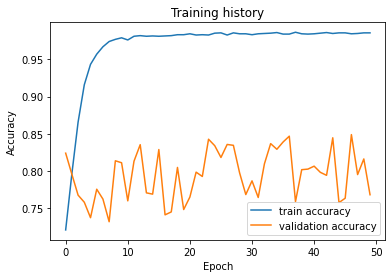

In [ ]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

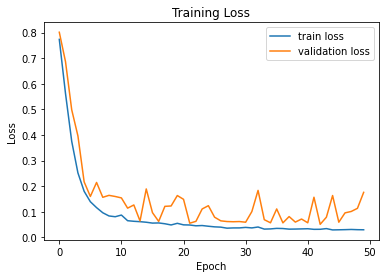

In [ ]:
plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='validation loss')

plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
test_acc = eval_model(model,test_data_loader,loss_fn,device,len(df_test))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.cpuset_checked
(tensor(0.8418, device='cuda:0', dtype=torch.float64),
1.8297128896964223,
tensor(0.8645, device='cuda:0'),
tensor(0.7849, device='cuda:0'),
tensor(0.8227, device='cuda:0'))


In [ ]:
#test_acc


(tensor(0.8418, device='cuda:0', dtype=torch.float64),
1.8297128896964223,
tensor(0.8645, device='cuda:0'),
tensor(0.7849, device='cuda:0'),
tensor(0.8227, device='cuda:0'))


In [ ]:
test_accuracy_val =  list(test_acc)

In [ ]:
test_accuracy_val[0]

0.8418120805369127